# Adults - Linear Classification

# Exercise
Load and preprocess the adult data, include dummy encoding and scaling.

Learn a logistic regression model and visualize the coefficients.

Then grid-search the regularization parameter C.

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Visualization Style
%matplotlib inline
#plt.style.use('seaborn-white')
plt.style.use('fivethirtyeight')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

## Import Dataset

In [2]:
data = pd.read_csv("../datasets/adult.csv", index_col=0)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
income = data.income == " >50K"
data_features = data.drop("income", axis=1)

In [4]:
data_features.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


## Data Encoding: using dummies

In [5]:
data_features.dtypes
data_features.shape

(32561, 13)

In [6]:
data_encoded = pd.get_dummies(data_features)
data_encoded.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_encoded.shape
data_encoded.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=107)

## Data Splitting

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, income)

## Data Preprocessing

In [9]:
#scaler = StandardScaler().fit(X_train)
#X_train_scaled = scaler.transform(X_train)

In [10]:
#scaler = MaxAbsScaler().fit(X_train)
#X_train_scaled = scaler.transform(X_train)

## Cross-Validation with default parameters

In [12]:
scores = cross_val_score(LogisticRegression(solver='liblinear'), X_train, y_train, cv=5)

In [13]:
scores

array([0.85895599, 0.84810645, 0.8486896 , 0.85091133, 0.85541675])

In [14]:
print("Scores Mean: ", scores.mean())

Scores Mean:  0.8524160223440201


## Grid-Search

In [15]:
param_grid = {'C': np.logspace(-3, 3, 7)}
param_grid

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [17]:
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5,
                    return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [18]:
print("Best Params: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Params:  {'C': 1.0}
Best Score:  0.8524160524160524


## Score Visualization

In [19]:
res = pd.DataFrame(grid.cv_results_)

In [20]:
res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [21]:
res[['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_C,mean_test_score,std_test_score,rank_test_score
0,0.001,0.813759,0.003187,7
1,0.01,0.847993,0.002095,6
2,0.1,0.852211,0.003503,4
3,1,0.852416,0.004160,1
4,10,0.852088,0.003170,5
5,100,0.852416,0.004069,1
6,1000,0.852252,0.004146,3


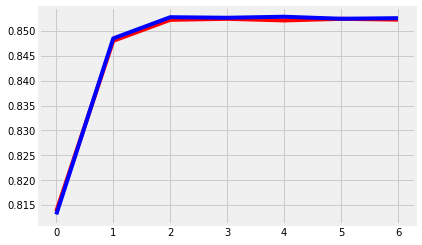

In [22]:
res.mean_test_score.plot(c='red')
res.mean_train_score.plot(c='blue')

In [30]:
param_C = grid.best_params_['C']
param_C

1.0

In [31]:
lr = LogisticRegression(solver='liblinear', C=param_C)

In [32]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
lr.score(X_test, y_test)

0.8507554354501904